# Demo for train and test data selection

In this notebook we present general functionalities for the `train_test_select` module.

In [1]:
import PCA.train_test_select as tts
import PCA.clustering as cl
import matplotlib.pyplot as plt
import numpy as np

Generate data set that has four distinct clusters with imbalanced number of samples in each cluster:

In [2]:
N_1, N_2, N_3, N_4 = 100, 250, 400, 500
n_observations = N_1 + N_2 + N_3 + N_4
mean_k1, mean_k2, mean_k3, mean_k4 = [-3, 3], [3, 3], [-3, -3], [3, -3] 
covariance = [[1, 0.2], [0.2, 1]]
x_k1, y_k1 = np.random.multivariate_normal(mean_k1, covariance, N_1).T
x_k2, y_k2 = np.random.multivariate_normal(mean_k2, covariance, N_2).T
x_k3, y_k3 = np.random.multivariate_normal(mean_k3, covariance, N_3).T
x_k4, y_k4 = np.random.multivariate_normal(mean_k4, covariance, N_4).T
x = np.vstack((x_k1[:,np.newaxis], x_k2[:,np.newaxis], x_k3[:,np.newaxis], x_k4[:,np.newaxis]))
y = np.vstack((y_k1[:,np.newaxis], y_k2[:,np.newaxis], y_k3[:,np.newaxis], y_k4[:,np.newaxis]))
idx = np.vstack((np.zeros((N_1, 1)), np.ones((N_2, 1)), 2*np.ones((N_3, 1)), 3*np.ones((N_4, 1)))).astype(int)
populations = cl.get_populations(idx, verbose=True)

Plot the original data set:

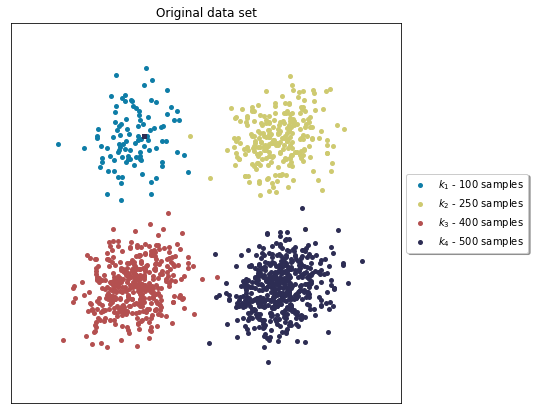

In [15]:
k_colors = ['#0e7da7', '#ceca70', '#b45050', '#2d2d54']
data_point = 2
figure = plt.figure(figsize=(7, 7))
figureSubplot = plt.subplot(1,1,1)
for k in range(0,4):
    plt.scatter(x[np.where(idx==k),0], y[np.where(idx==k),0], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(populations[k]) + ' samples')
plt.axis('equal')
plt.xlim([-8,8]), plt.ylim([-8,8])
plt.xticks([]), plt.yticks([])
plt.title('Original data set')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=1)

***

## Select fixed number

In [4]:
(idx_train, idx_test) = tts.train_test_split_fixed_number_from_idx(idx, 15, test_selection_option=2, bar50=True, verbose=True)

The number of samples that will be select from each cluster is 46.

Cluster 1: taking 46 training samples out of 100 observations (46.0%).
Cluster 2: taking 46 training samples out of 250 observations (18.4%).
Cluster 3: taking 46 training samples out of 400 observations (11.5%).
Cluster 4: taking 46 training samples out of 500 observations (9.2%).
Cluster 1: taking 54 test samples out of 54 remaining observations (100.0%).
Cluster 2: taking 54 test samples out of 204 remaining observations (26.5%).
Cluster 3: taking 54 test samples out of 354 remaining observations (15.3%).
Cluster 4: taking 54 test samples out of 454 remaining observations (11.9%).

Selected 184 training samples (14.7%) and 216 test samples (17.3%).



Visualize the sampled data set:

Text(0.5, 1.0, 'Test data')

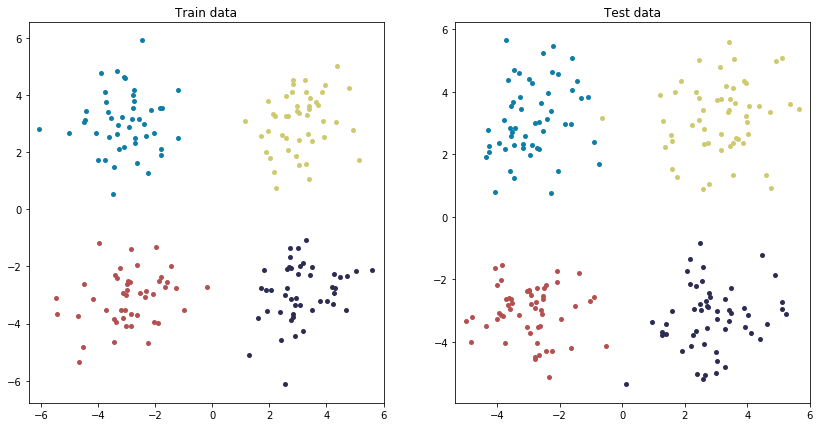

In [5]:
figure = plt.figure(figsize=(14, 7))

figureSubplot = plt.subplot(1,2,1)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_train if idx[idxt,]==k],0], y[[idxt for idxt in idx_train if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
    plt.xlim([-8,8]), plt.ylim([-8,8])
plt.axis('equal')
plt.title('Train data')

figureSubplot = plt.subplot(1,2,2)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_test if idx[idxt,]==k],0], y[[idxt for idxt in idx_test if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
    plt.xlim([-8,8]), plt.ylim([-8,8])
plt.axis('equal')
plt.title('Test data')

***

## Select fixed percentage

In [6]:
(idx_train, idx_test) = tts.train_test_split_percentage_from_idx(idx, 10, verbose=True)

Cluster 1: taking 10 training samples out of 100 observations (10.0%).
Cluster 2: taking 25 training samples out of 250 observations (10.0%).
Cluster 3: taking 40 training samples out of 400 observations (10.0%).
Cluster 4: taking 50 training samples out of 500 observations (10.0%).

Selected 125 training samples (10%) and 1125 test samples (90%).



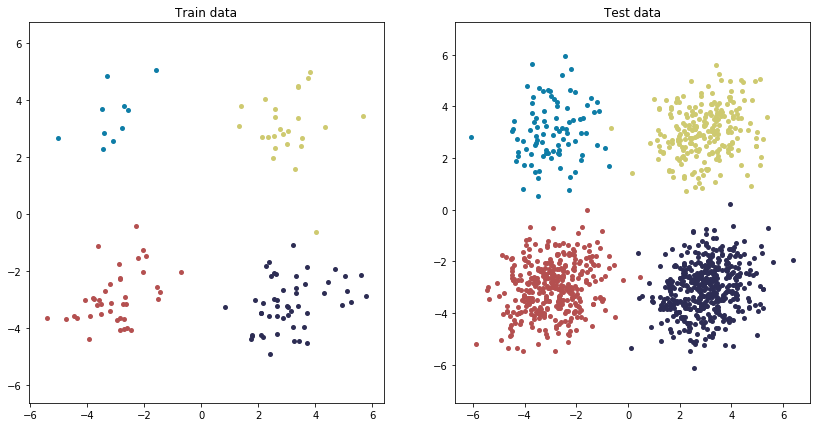

In [7]:
figure = plt.figure(figsize=(14, 7))
figureSubplot = plt.subplot(1,2,1)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_train if idx[idxt,]==k],0], y[[idxt for idxt in idx_train if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
plt.title('Train data')
plt.xlim([-7,7]), plt.ylim([-7,7])
plt.axis('equal')
figureSubplot = plt.subplot(1,2,2)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_test if idx[idxt,]==k],0], y[[idxt for idxt in idx_test if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
plt.title('Test data')
plt.xlim([-7,7]), plt.ylim([-7,7])
plt.axis('equal')
plt.show()

***


## Select manually

In [8]:
(idx_train, idx_test) = tts.train_test_split_manual_from_idx(idx, {0:4, 1:5, 2:10, 3:2}, sampling_type='number', bar50=False, verbose=True)

Cluster 1: taking 4 training samples out of 100 observations (4.0%).
Cluster 2: taking 5 training samples out of 250 observations (2.0%).
Cluster 3: taking 10 training samples out of 400 observations (2.5%).
Cluster 4: taking 2 training samples out of 500 observations (0.4%).

Selected 21 training samples (1.7%) and 1229 test samples (98.3%).



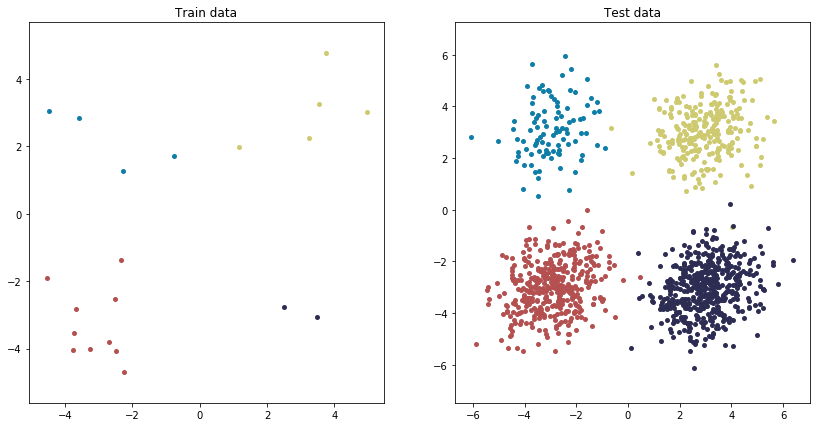

In [9]:
figure = plt.figure(figsize=(14, 7))
figureSubplot = plt.subplot(1,2,1)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_train if idx[idxt,]==k],0], y[[idxt for idxt in idx_train if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
plt.title('Train data')
plt.xlim([-7,7]), plt.ylim([-7,7])
plt.axis('equal')
figureSubplot = plt.subplot(1,2,2)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_test if idx[idxt,]==k],0], y[[idxt for idxt in idx_test if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
plt.title('Test data')
plt.xlim([-7,7]), plt.ylim([-7,7])
plt.axis('equal')
plt.show()

***

## Select at random

In [10]:
(idx_train, idx_test) = tts.train_test_split_random(n_observations, 20, idx_test=[], verbose=True)

Selected 250 training samples (20.0%) and 1000 test samples (80.0%).



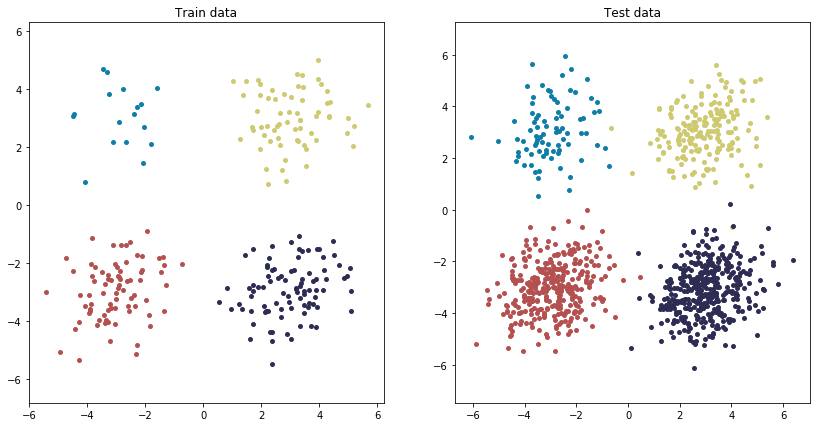

In [11]:
figure = plt.figure(figsize=(14, 7))
figureSubplot = plt.subplot(1,2,1)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_train if idx[idxt,]==k],0], y[[idxt for idxt in idx_train if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
plt.title('Train data')
plt.xlim([-7,7]), plt.ylim([-7,7])
plt.axis('equal')
figureSubplot = plt.subplot(1,2,2)
for k in range(0,4):
    plt.scatter(x[[idxt for idxt in idx_test if idx[idxt,]==k],0], y[[idxt for idxt in idx_test if idx[idxt,]==k],0], color=k_colors[k], marker='.', linewidth=data_point)
plt.title('Test data')
plt.xlim([-7,7]), plt.ylim([-7,7])
plt.axis('equal')
plt.show()